In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shopping-mall-customer-segmentation-data/Shopping Mall Customer Segmentation Data .csv


<h3>Import Libraries and Datasets</h3>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/shopping-mall-customer-segmentation-data/Shopping Mall Customer Segmentation Data .csv')

<h3> Data Modeling</h3>

In [4]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [5]:
df.shape

(15079, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.1+ KB


In [7]:
df.describe(include='all')

,Customer ID,Age,Gender,Annual Income,Spending Score
count,15079,15079.000000,15079,15079.000000,15079.000000
unique,15079,NaN,2,NaN,NaN
top,d410ea53-6661-42a9-ad3a-f554b05fd2a7,NaN,Male,NaN,NaN
freq,1,NaN,7595,NaN,NaN
mean,NaN,54.191591,NaN,109742.880562,50.591617
std,NaN,21.119207,NaN,52249.425866,28.726977
min,NaN,18.000000,NaN,20022.000000,1.000000
25%,NaN,36.000000,NaN,64141.000000,26.000000
50%,NaN,54.000000,NaN,109190.000000,51.000000
75%,NaN,72.000000,NaN,155008.000000,75.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

In [10]:
df

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76
...,...,...,...,...,...
15074,a0504768-a85f-4930-ac24-55bc8e4fec9e,29,Female,97723,30
15075,a08c4e0e-d1fe-48e7-9366-aab11ae409cd,22,Male,73361,74
15076,0e87c25a-268c-401a-8ba1-7111dcde6f1a,18,Female,112337,48
15077,5f388cbe-3373-4e16-b743-38f508f2249f,26,Female,94312,5


<h1>(Exploratory Data Analysis)EDA</h1>

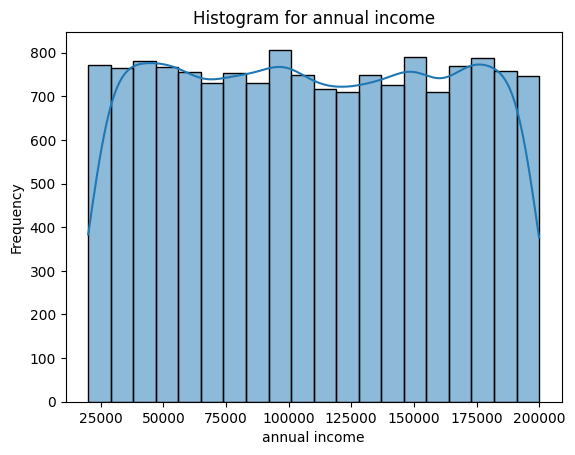

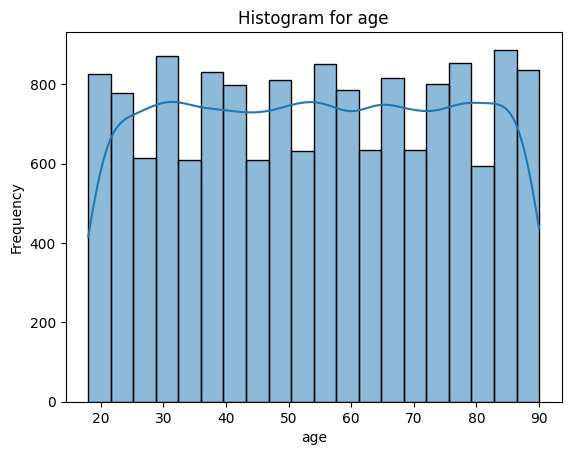

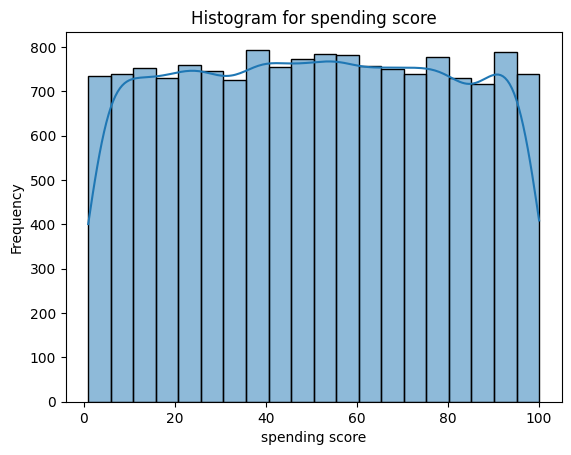

In [11]:
df.columns = df.columns.str.lower()
columns = ['annual income', 'age', 'spending score']

for column in columns:
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

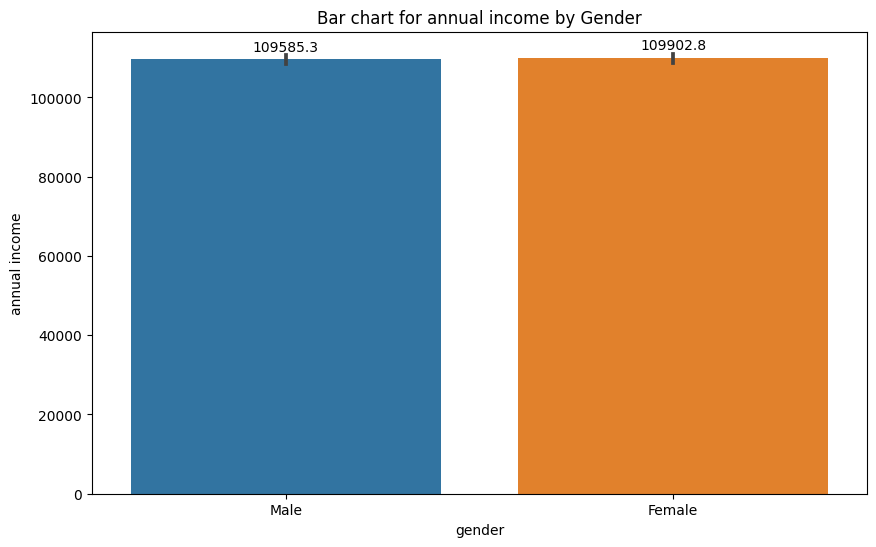

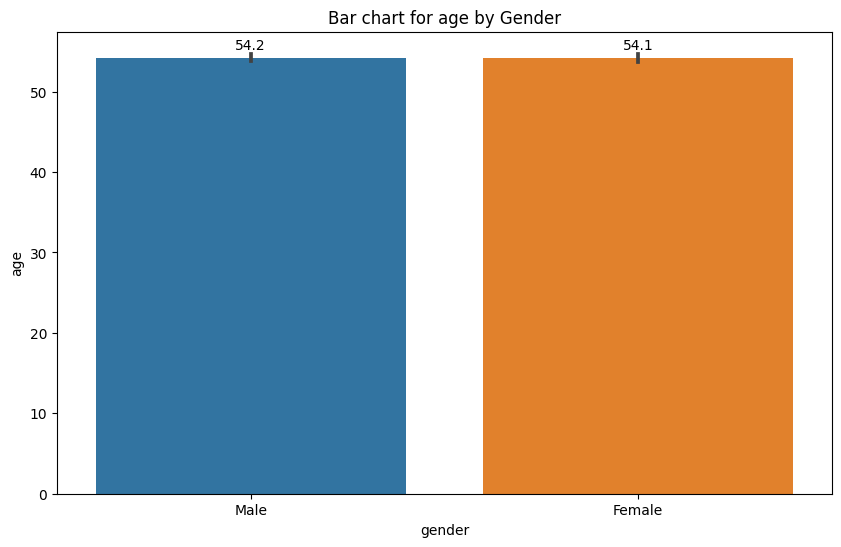

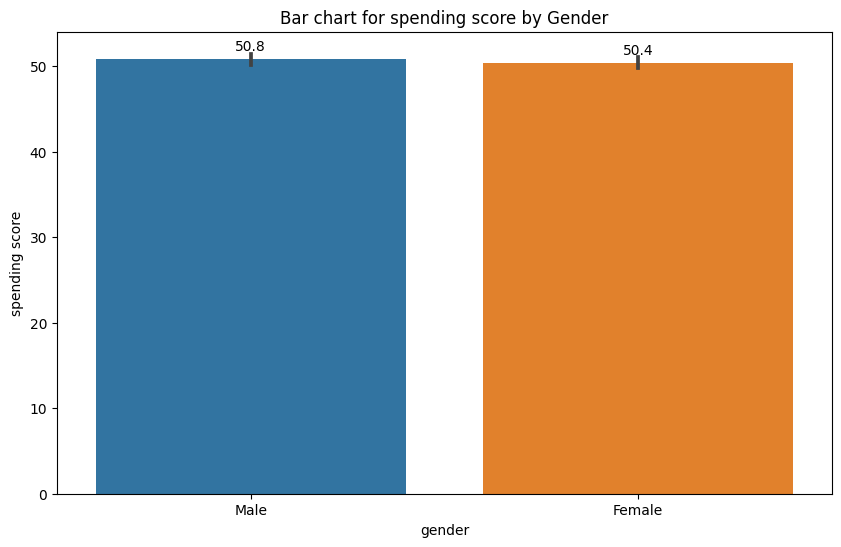

In [12]:
for column in columns:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, y=column, x='gender')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

    plt.title(f'Bar chart for {column} by Gender')
    plt.xlabel('gender')
    plt.ylabel(column)
    


In [13]:
for column in columns:
    # Create a pie chart for the current column
    fig = px.box(df,y=column,x='gender',color='gender',title=f'chart for {column} for Gender' )

    # Show the pie chart
    fig.show()

In [14]:
df['gender'].value_counts(normalize=True)


gender
Male      0.503681
Female    0.496319
Name: proportion, dtype: float64

In [15]:
pd.set_option('display.max_rows',None)

In [16]:
df.corr(numeric_only=True)

,age,annual income,spending score
age,1.000000,0.004776,-0.008251
annual income,0.004776,1.000000,0.003234
spending score,-0.008251,0.003234,1.000000


In [17]:
df.groupby(['gender'])['age'].mean()

gender
Female    54.148316
Male      54.234233
Name: age, dtype: float64

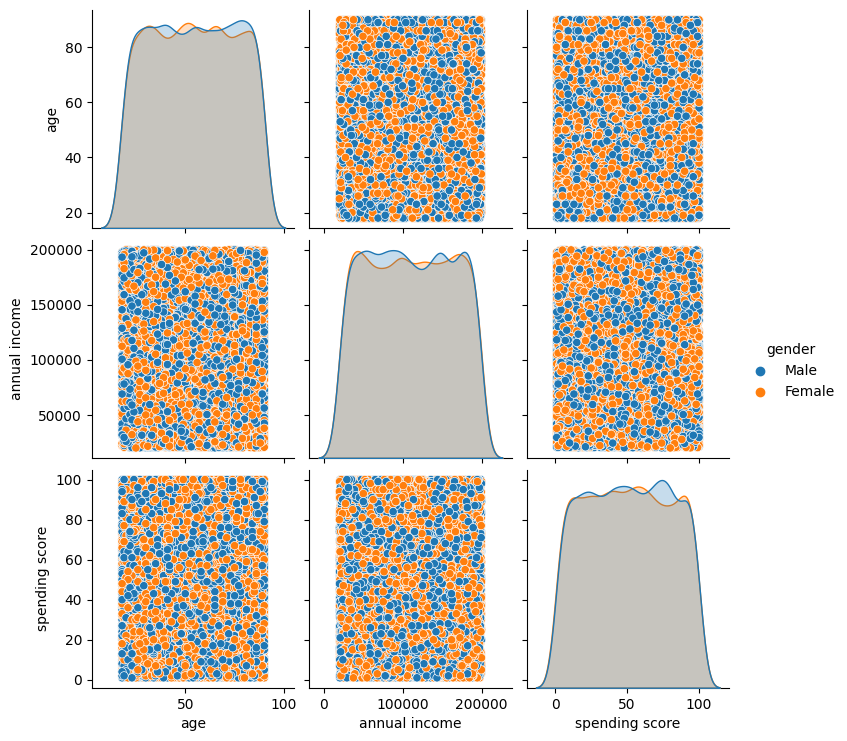

In [18]:
sns.pairplot(df,hue='gender',hue_order=['Male','Female'],dropna='True')
plt.show()

In [19]:
df['gender'] = df['gender'].map({'Male':'0','Female':'1'})

<h1> Clustering </h1>

In [20]:
inertia = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_predict(df[['annual income','spending score']])
    inertia.append(kmeans.inertia_)
inertia


[41162990188659.08,
 10155999245602.342,
 4499743201508.485,
 2511079243750.5977,
 1614218975659.9177,
 1132577091375.98,
 839385333471.2026,
 630709947535.5035,
 498243694703.5011,
 406020875486.0061]

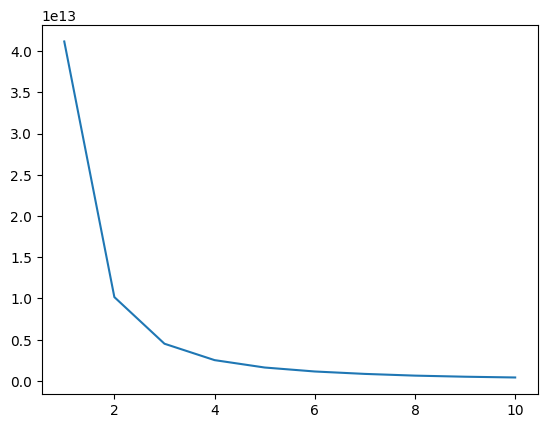

In [21]:
plt.plot(range(1,11),inertia)

In [22]:
clustering = KMeans(n_clusters=4)
clustering.fit(df[['annual income','spending score']])
clustering.labels_

array([2, 0, 3, ..., 2, 3, 3], dtype=int32)

In [23]:
df['income'] = clustering.labels_

In [24]:
df['income'].value_counts()

income
1    3918
3    3836
0    3664
2    3661
Name: count, dtype: int64

In [25]:
clustering.inertia_

2510663592738.342

In [26]:
centers=pd.DataFrame(clustering.cluster_centers_)
centers.columns=['x','y']

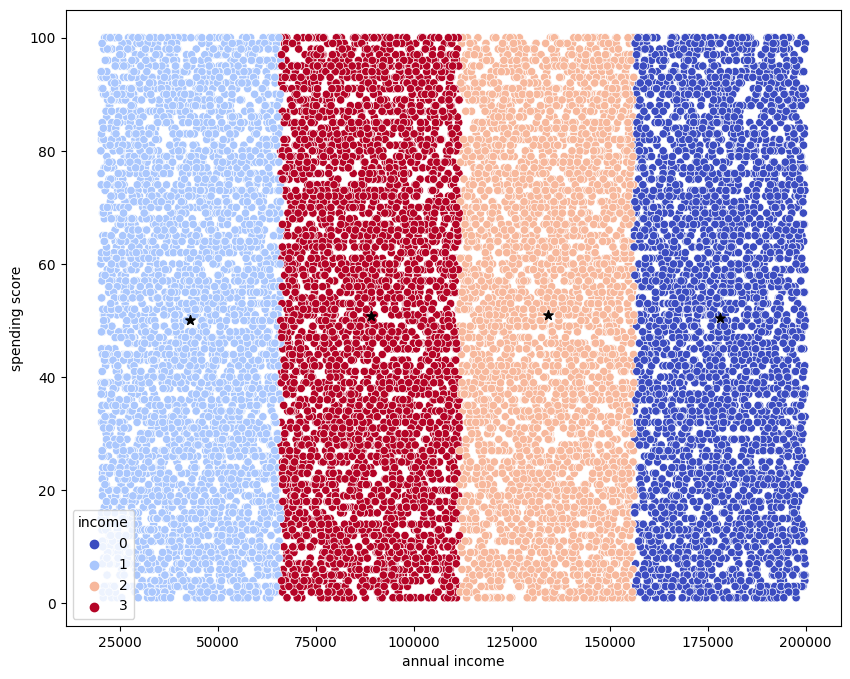

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='annual income',y='spending score',hue='income',palette='coolwarm')
plt.scatter(x=centers['x'],y=centers['y'],s=50,c='black',marker='*')


In [28]:
submission = pd.crosstab(df['income'],df['gender'])

In [29]:
submission.to_csv("Submission.csv",index="False")

In [30]:
submission

gender,0,1
income,,
0,1820,1844
1,1961,1957
2,1841,1820
3,1973,1863
